In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from train_efn import train_efn
import numpy as np
from scipy.stats import dirichlet
from tf_util.families import family_from_str
from tf_util.stat_util import get_density_func
from efn_util import model_opt_hps
import os, sys
from dirichlet import simplex
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

os.chdir('../../');

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
exp_fam = 'dirichlet';
D = 3;
nlayers = 2;
give_inverse_hint = False;
random_seed = 0;
dist_seed = 0;
dir_str = 'dirichlet_bv';

TIF_flow_type, _, lr_order = model_opt_hps(exp_fam, D);

flow_dict = {'latent_dynamics':None, \
             'TIF_flow_type':TIF_flow_type, \
             'repeats':nlayers};

scale = 0.5;
eta_dist = {'family':'isotropic_truncated_normal', 'mu':np.array([1.0, 2.0, 3.0]), \
            'scale':scale};

fam_class = family_from_str(exp_fam);
family = fam_class(D, 1, eta_dist);

param_net_input_type = 'eta';
cost_type = 'KL';
K = 100;
M = 1000;
stochastic_eta = True;
dist_seed = 0;
min_iters = 50000;
max_iters = 1000000;
check_rate = 100;

In [11]:
#X, train_KLs, it = train_efn(family, flow_dict, param_net_input_type, cost_type, K, M, \
#                         stochastic_eta, give_inverse_hint, lr_order, dist_seed, random_seed, \
#                         min_iters, max_iters, check_rate, dir_str);

In [12]:
savedir = '/Users/sbittner/Documents/efn/results/%s/EFN_dirichlet_itn_s=%.2f_D=%d_K=100_M=1000_flow=%dP_L=4_rs=0/' % (dir_str, scale, D, nlayers);
fname = savedir + 'results.npz';
npzfile = np.load(fname);
eta_dist = npzfile['eta_dist'][()];
train_params = npzfile['train_params'];
eta_density = get_density_func(eta_dist, D);
train_KLs = npzfile['train_KLs'];
train_R2s = npzfile['train_R2s'];
last_ind = np.where(train_KLs[:,0] == 0.0)[0][0]-1;
train_KLs = train_KLs[last_ind,:];
train_R2s = train_R2s[last_ind,:];



(100,)


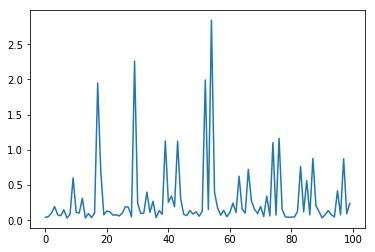

In [20]:
print(train_KLs.shape);
plt.figure()
plt.plot(train_KLs);
plt.show();

In [14]:
K = len(train_params);

alphas = np.zeros((K,D));
densities = np.zeros((K,));
for i in range(K):
    alpha_i = train_params[i]['alpha'];
    alphas[i,:] = alpha_i;
    densities[i] = eta_density(alpha_i);

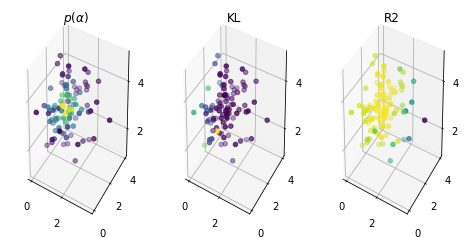

In [15]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(alphas[:,0], alphas[:,1], alphas[:,2], c=densities);
ax.set_title(r'$p(\alpha)$');
ax = fig.add_subplot(132, projection='3d')
ax.scatter(alphas[:,0], alphas[:,1], alphas[:,2], c=train_KLs);
ax.set_title('KL');
ax = fig.add_subplot(133, projection='3d')
ax.scatter(alphas[:,0], alphas[:,1], alphas[:,2], c=train_R2s);
ax.set_title('R2');


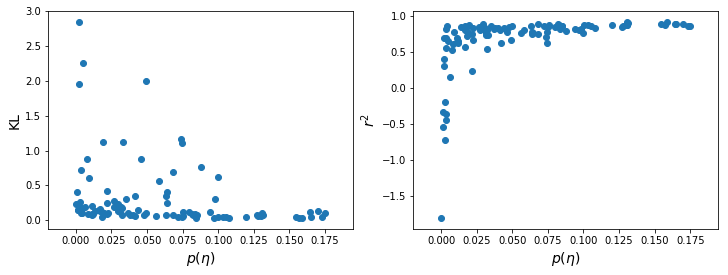

In [19]:
fontsize = 14;
plt.figure(figsize=(12,4));
plt.subplot(1,2,1);
plt.scatter(densities, train_KLs);
plt.xlabel(r'$p(\eta)$', fontsize=fontsize);
plt.ylabel('KL', fontsize=fontsize);

plt.subplot(1,2,2);
plt.scatter(densities, train_R2s);
plt.xlabel(r'$p(\eta)$', fontsize=fontsize);
plt.ylabel(r'$r^2$', fontsize=fontsize);
plt.show();